In [1]:
import matplotlib.pyplot as plt
import torch

from blocks import CosBlock, SinBlock, Log2Block, LnBlock, Log10Block, LinearBlock, SigmoidBlock
from model import ModelFactory, MultiLayerModelFactory

# Better printing

## Simple model

In [2]:
x = torch.arange(1, 10, 0.1, dtype=torch.float32).unsqueeze(-1)
y = torch.sin(x) + torch.log2(x)
model = ModelFactory(x, y, max_size=2).from_class_list([CosBlock, SinBlock, Log2Block, LnBlock, Log10Block])
pred = model.forward(x)

In [3]:
print(model)

y = sin(x) * 1.0016 + ln(x) * 1.4464


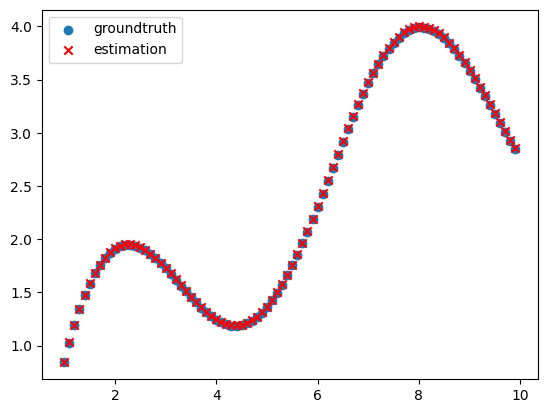

In [4]:
plt.scatter(x, y, label="groundtruth")
plt.scatter(x, pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

## Multi-layer model

In [5]:
torch.autograd.set_detect_anomaly(True)

x = torch.arange(1, 20, 0.1, dtype=torch.float32).unsqueeze(-1)
y = torch.sin(0.4 + torch.cos(x) + 1.2 * torch.sin(x)) + torch.cos(0.3 * torch.sin(x) + 1.8 * torch.cos(x))
model = MultiLayerModelFactory(x, y, max_size=3, layers=3, epochs=10000).from_class_list(
    [CosBlock, SinBlock], block=SinBlock)
pred = model.forward(x)

In [6]:
print(model)

y = sin((cos((cos((cos(x) * -0.5213 + sin(x) * 1.1339)) * -1.4975 + sin((cos(x) * -1.9708 + sin(x) * -0.2883)) * 0.7950)) * 0.5398 + sin((cos((cos(x) * 2.0394 + sin(x) * 0.3526)) * 0.1574 + sin((cos(x) * 0.9567 + sin(x) * 0.7651)) * 0.5257)) * 1.7665)) * 2.0559


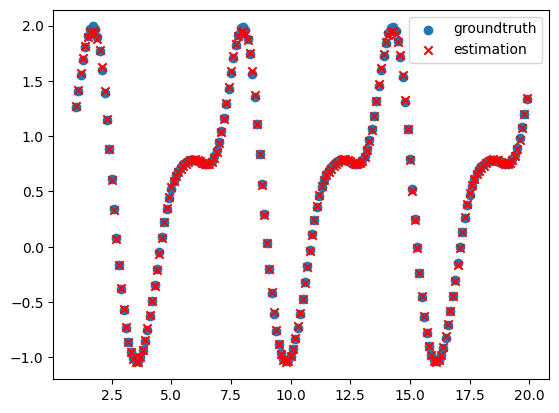

In [7]:
plt.scatter(x, y, label="groundtruth")
plt.scatter(x, pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

## 3D model

In [11]:
x1 = torch.arange(1, 20, 0.1, dtype=torch.float32).unsqueeze(-1)
x2 = torch.exp(torch.arange(1, 2.9, 0.01, dtype=torch.float32)).unsqueeze(-1)
x3 = torch.log(torch.arange(1, 57.9, 0.3, dtype=torch.float32).unsqueeze(-1))
x = torch.hstack([x1, x2, x3])
y = torch.sin(x1) + torch.cos(x1 * x2) + torch.log(0.4 + x2 * x3)

model = MultiLayerModelFactory(x, y, max_size=2, layers=2).from_class_list(
    [CosBlock, SinBlock, LinearBlock, SigmoidBlock])
pred = model.forward(x)

In [12]:
print(model)

y = (cos((cos(x) * [[0.0124], [0.4275], [-0.1297]] + sin(x) * [[0.2319], [0.7452], [-0.4948]])) * 4.8233 + sigmoid((cos(x) * [[-2.3632], [2.7873], [12.7739]] + sin(x) * [[-4.1145], [-5.2017], [0.9554]])) * -4.8313) * 0.8634


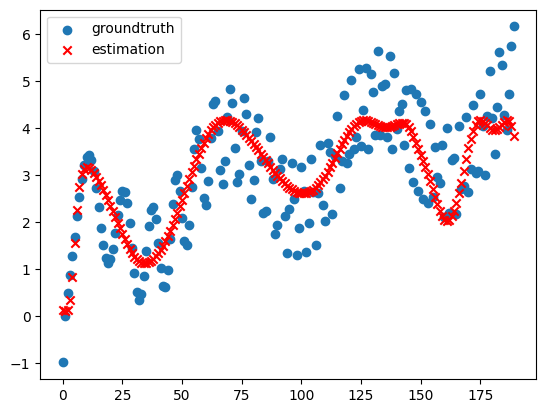

In [13]:
plt.scatter(list(range(len(y))), y, label="groundtruth")
plt.scatter(list(range(len(y))), pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()